In [ ]:
import cv2
import matplotlib.pyplot as plt
import functions as fn

In [2]:
img, grad_x, grad_y = fn.gradients('../cat.webp')

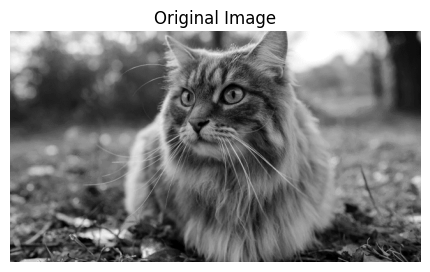

In [3]:
plt.figure(figsize=(18, 6))  
plt.subplot(1, 3, 1)  
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

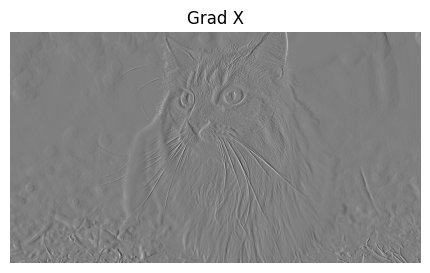

In [4]:
plt.figure(figsize=(5.3, 4))  
plt.imshow(grad_x, cmap='gray')
plt.title("Grad X")
plt.axis('off')
plt.show()

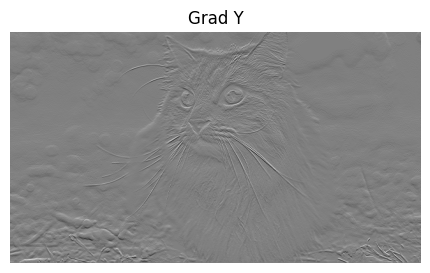

In [5]:
plt.figure(figsize=(5.3, 4))  
plt.imshow(grad_y, cmap='gray')
plt.title("Grad Y")
plt.axis('off')
plt.show()

In [6]:
recon_img = fn.poisson_reconstruction(grad_x, grad_y)
recon_img = (recon_img - recon_img.min()) / (recon_img.max() - recon_img.min()) * 255

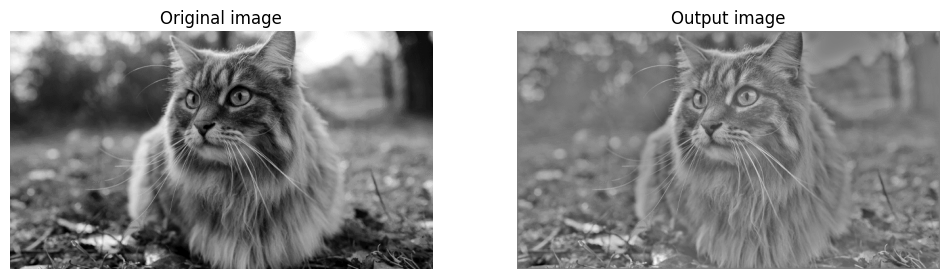

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(recon_img, cmap='gray')
plt.title('Output image')
plt.axis('off')
plt.show()

In [8]:
sparse = fn.reconstruct_image_sparse(grad_x, grad_y)

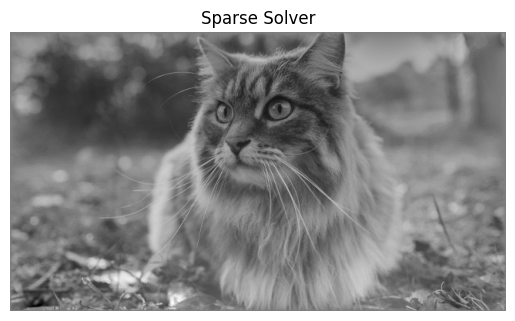

In [9]:
plt.title('Sparse Solver')
plt.imshow(sparse, cmap='gray')
plt.axis('off')
plt.show()

In [17]:
img = cv2.imread('../cat.webp')
grass = cv2.imread('../grass.webp')
mask = cv2.imread('../mask.png', 0) 
tx = img.shape[1]//2 - grass.shape[1]//2
ty = img.shape[0]//2 - grass.shape[0]//2
offset = (tx, ty)

blended = fn.poisson_blend_seidel(grass, img, mask, offset)

[Channel 0] Converged at iteration 1957, diff 0.001000
[Channel 1] Converged at iteration 1185, diff 0.001000
[Channel 2] Converged at iteration 1162, diff 0.001000


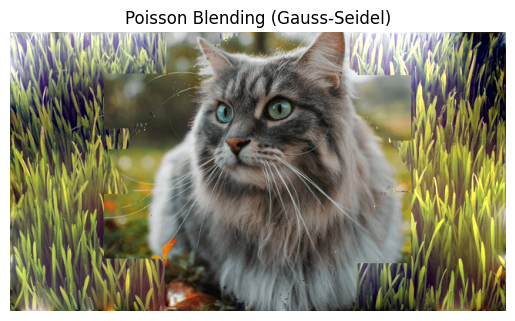

In [18]:
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title('Poisson Blending (Gauss-Seidel)')
plt.axis('off')
plt.show()